In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant
from scipy.optimize import curve_fit

# Maxwell-Boltzmann Distribution
The Maxwell-Boltzmann distribution is a distribution in velocity. Thus we aim to find that the velocities of our particles, after a sufficient number of collisions, follow this distribution. The same would be true for momentum for particles that do not change in mass. For energy, however, the probability distribution of the energies of the particles is modelled by a simpler Boltzmann distribution.
## 1 Dimension in Velocity
The Maxwell-Boltzmann Distribution in 1 Dimension has the form:
$$ f_{1D}(v)=\left(\frac{m}{2πkT}\right)^{1/2} exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{2kT}{\pi m} \right)^{1/2}.$$
To interpret as speed and not velocity the distribution is multiplied by 2. 

A generalised form of the formula can be seen here:
$$f(v) = 2\sqrt{\frac{\alpha}{\pi}}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## 2 Dimensions in Velocity
The Maxwell-Boltzmann Distribution in 2 Dimensiona has the form:
$$ f_{2D}(v)=\left(\frac{m}{2πkT}\right)exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{8kT}{\pi m} \right).$$

A generalised form of the formula can be seen here:
$$f(v) = \frac{\alpha}{\pi}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## Boltzmann Distribution in Energy
The Boltzmann distribution defines the probability that a system will be in a certain state as a function of that state's energy and temperature and is expressed in the form:
$$p(\epsilon_i) \approx e^{-\frac{\epsilon_i}{k_BT}}$$
where $\epsilon_i$ is the energy of the state, and $p$ is the probaility of the system being in state $i$

[1. 2.]


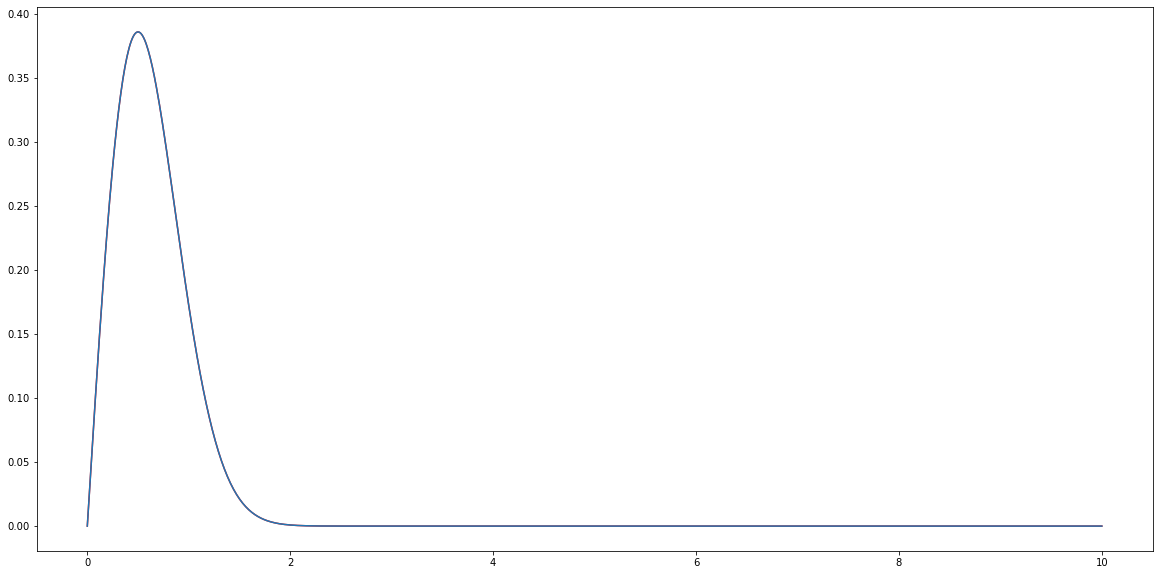

In [45]:
import numpy as np
import scipy.constants as constant
import math

# def Maxwell_Boltzmann_1D(v, v_offset = 0, background = 0,m=1,T=10000):
#     return background + 2*np.sqrt(m/(2*np.pi*constant.k*T)) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))

def Maxwell_Boltzmann_1D(v, m=1, T=10000):
    return 2*np.sqrt(m/(2*np.pi*constant.k*T)) * np.exp(-(m*(v)**2)/(2*constant.k*T))

def Maxwell_Boltzmann_1D_Simple(v, v_offset = 0, k = 1, alpha = 2):
    # return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)
    # return background + 2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)
    return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)

def Maxwell_Boltzmann_2D(v, v_offset = 0,m=1,T=10000):
    return (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))
    # return background + (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))


def Maxwell_Boltzmann_2D_Simple(v,v_offset = 0, k=1, alpha=2):
    return k*2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)
    # return k*2*alpha/np.pi*(v)* np.exp(-alpha*(v)**2)
    # return background + 2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)


v = np.linspace(0,10,1000)
f = Maxwell_Boltzmann_2D_Simple(v)
plt.plot(v,f,'r')

params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, v, f, p0=[1,20])
perr = np.sqrt(np.diag(pcov))
x_interval_for_fit = np.linspace(v[0], v[-1], 10000)
print(params)

# popt[3] = params[]
# popt[2] = params[2]
# popt[1] = params[1]
# popt[0] = params[0]
plt.plot(v, Maxwell_Boltzmann_2D_Simple(v, *params), label='f')

# fig, axes = plt.subplots(2,2)

# axes.flat[0].plot(v,Maxwell_Boltzmann_1D(v))
# axes.flat[0].title.set_text('Maxwell-Boltzmann Distribution in 1D')
# axes.flat[1].plot(v,Maxwell_Boltzmann_2D(v))
# axes.flat[1].title.set_text('Maxwell-Boltzmann Distribution in 2D')

# v_simple = np.linspace(0,5,1000)

# axes.flat[2].plot(v_simple,Maxwell_Boltzmann_1D_Simple(v_simple))
# axes.flat[2].title.set_text('Maxwell-Boltzmann Distribution in 1D')
# axes.flat[3].plot(v_simple,Maxwell_Boltzmann_2D_Simple(v_simple))
# axes.flat[3].title.set_text('Maxwell-Boltzmann Distribution in 2D')


plt.show()

In [37]:
class Particle:
    def __init__(self,v = 20, m = 50):
        self._velocity = v
        self._mass = m
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*self._velocity**2

    @property
    def velocity(self):
        # print("getter method called")
        return self._velocity

    @velocity.setter
    def velocity(self, value):
        # print("setter method called")
        self._velocity = value
        self.momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
        # print(self.energy)
        
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self.momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
            
class Particle2D:
    def __init__(self,velocity_x = 1, velocity_y = 2, m = 3):
        self._velocity = np.array((float(velocity_x),float(velocity_y)))
        self._mass = m
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self.momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def momentum_x(self):
        return self._momentum[0]
    
    @property
    def momentum_y(self):
        return self._momentum[1]

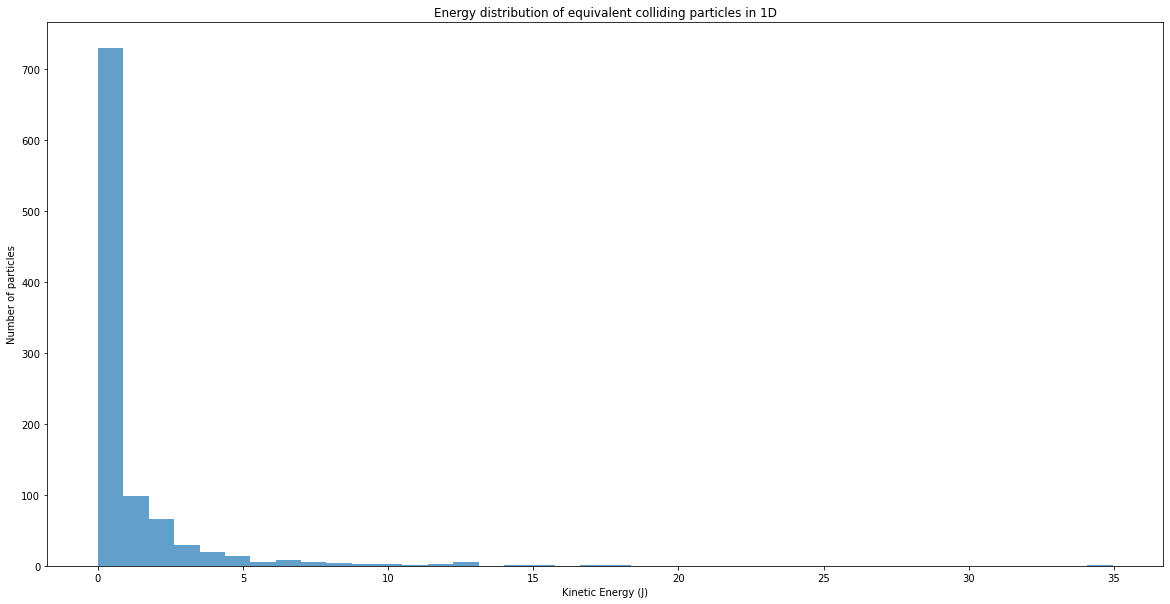

C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:12: RuntimeWarning: invalid value encountered in sqrt
  return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)
C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:12: RuntimeWarning: overflow encountered in exp
  return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)


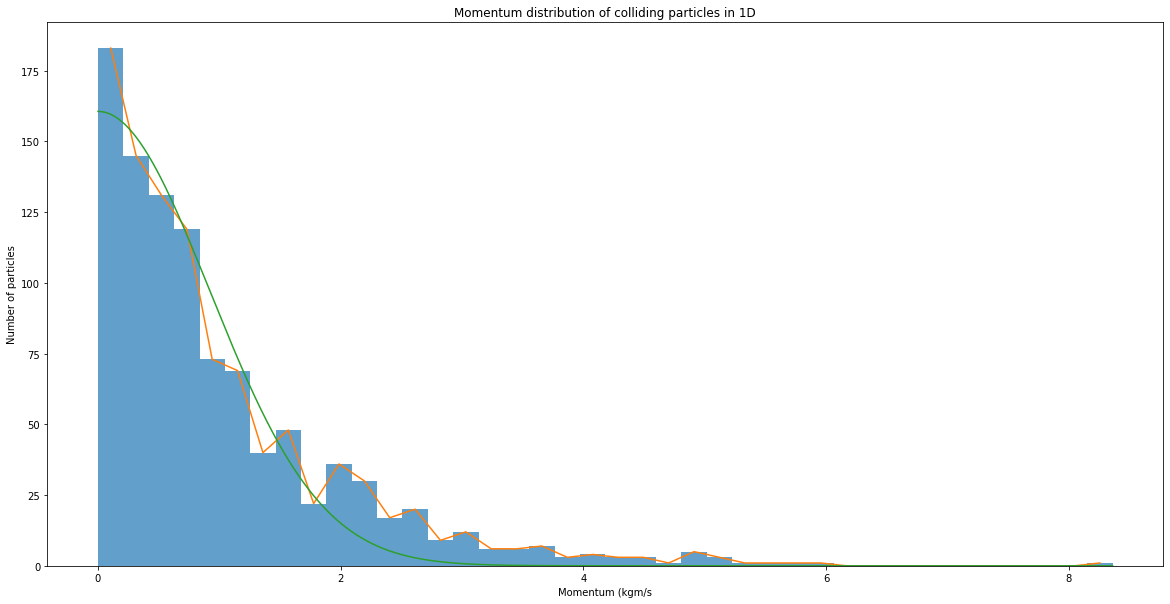

C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:12: RuntimeWarning: invalid value encountered in sqrt
  return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)
C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:12: RuntimeWarning: overflow encountered in exp
  return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)


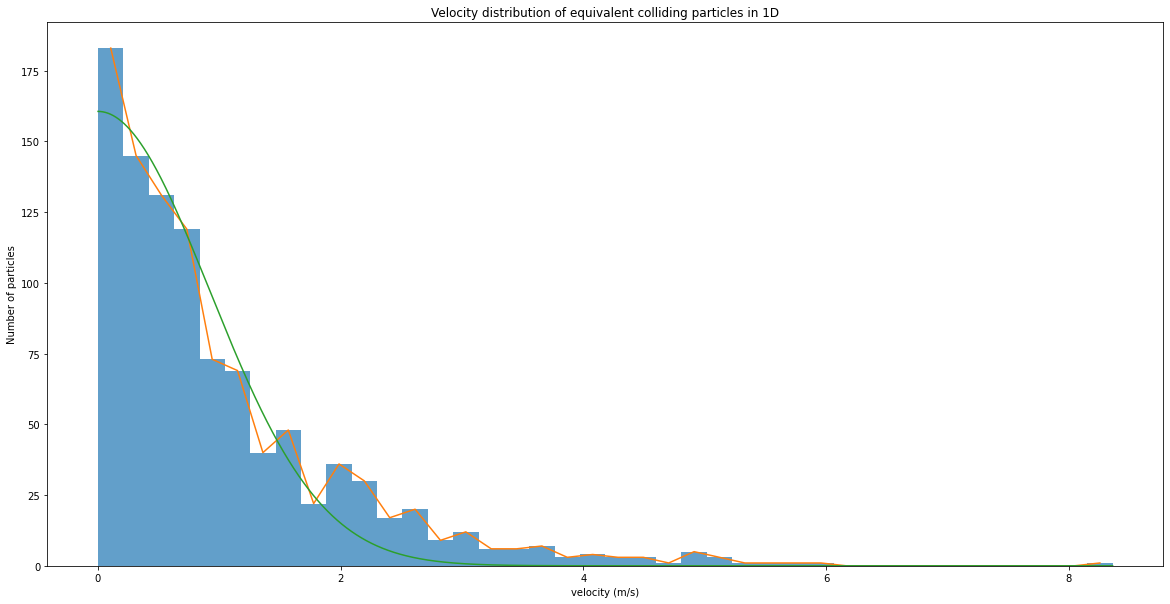

In [54]:
class Simulation():
    
    def __init__ (self,starting_velocity = 1,particle_mass = 1, no_particles = 100, no_collisions=1000, Temperature = 273):
        self.no_particles = int(no_particles)
        self.no_collisions = int(no_collisions)
        self.T = Temperature
        self.v0 = starting_velocity
        self.m = particle_mass
        
        self.init_particles()
        
    def init_particles(self):
        
        self.particle_history = np.ones([4,self.no_particles,self.no_collisions])
        self.particles = []

        # Creating particle object for each particle in simulation
        for i in range(self.no_particles):
            
            # Creating particle with velocity v0 and mass m
            particle = Particle(v = self.v0, m = self.m)
            
            # Adding newly created particle to particle array
            self.particles.append(particle)
            
            # Adding particle properties to history array
            self.particle_history[0,i,0] = particle.velocity
            self.particle_history[1,i,0] = particle.mass
            self.particle_history[2,i,0] = particle.energy
            self.particle_history[3,i,0] = particle.momentum
        
    # Do we want to randomise the number of collisions in any time step
    # Can we have only 1 collision for each particle for each time step
    
    def begin_simulation(self,collision_type = 'random'):
        self.type = collision_type
        
        for step in range(1,self.no_collisions):
            self.step = step
            self.simulate_set_of_collisions()
        
    def plot_data(self):
        self.plot_energy_histogram()
        self.plot_momentum_histogram()
        self.plot_velocity_histogram()
        
        
    def simulate_set_of_collisions(self):
        # Randomise which particle is being collided with using randomised collision array as an index for collisions
        collision_partner = np.array(range(0,self.no_particles))
        np.random.shuffle(collision_partner)
        
        # number of collisions = number of particles/2
        for i in range(int(self.no_particles/2)):
            
            #index for collisions partners
            index1 = collision_partner[i]
            index2 = collision_partner[(i+int(self.no_particles/2)) % self.no_particles] # modulus to wrap array indices
            
            # Calling the collision method
            self.collision(self.particles[index1],self.particles[index2])
            
            # Updating particle history
            
            #velocity
            self.particle_history[0,index1,self.step] = self.particles[index1].velocity
            self.particle_history[0,index2,self.step] = self.particles[index2].velocity
            
            # mass
            self.particle_history[1,index1,self.step] = self.particles[index1].mass
            self.particle_history[1,index2,self.step] = self.particles[index2].mass
            
            # energy
            self.particle_history[2,index1,self.step] = self.particles[index1].energy
            self.particle_history[2,index2,self.step] = self.particles[index2].energy
            
            # momentum
            self.particle_history[3,index1,self.step] = self.particles[index1].momentum
            self.particle_history[3,index2,self.step] = self.particles[index2].momentum
            
    def collision(self,particle1,particle2):
        
        # Select for type of collision
        if self.type == 'random':
            self.random_collision(particle1,particle2)
        
            
    def random_collision(self,particle1,particle2):
        
        # mv + m'v' (before) = mv + m'v' (after) 
        p_before = particle1.mass*particle1.velocity + particle2.mass*particle2.velocity
        
        # Randomise transfer of energy between 2 particles
        fractional_momentum_transfer = np.random.random()
        
        
        p_after_1 = fractional_momentum_transfer*p_before
        p_after_2 = (1-fractional_momentum_transfer)*p_before
        
        v_after_1 = p_after_1/particle1.mass
        v_after_2 = p_after_2/particle2.mass
        # Returning velocities after the collision
        
        particle1.velocity = v_after_1
        particle2.velocity = v_after_2
    

    def fit_Maxwell_Boltzmann_1D(self,bin_heights, bin_edges):
        
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)
        
        opt_params, pcov = curve_fit(Maxwell_Boltzmann_1D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_1D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')

    
    def plot_energy_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        bin_heights, bin_edges, _ = plt.hist(self.particle_history[2,-1,:],bins=40,alpha=0.7)
        # self.fit_Maxwell_Boltzmann_1D(bin_heights,bin_edges)
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Kinetic Energy (J)')
        plt.ylabel('Number of particles')
        plt.title('Energy distribution of equivalent colliding particles in 1D')
        plt.show()
        
    def plot_momentum_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        bin_heights, bin_edges, _ = plt.hist(self.particle_history[3,-1,:],bins=40,alpha=0.7)
        self.fit_Maxwell_Boltzmann_1D(bin_heights,bin_edges)
        
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Momentum (kgm/s')
        plt.ylabel('Number of particles')
        plt.title('Momentum distribution of colliding particles in 1D')
        plt.show()
        
    
    def plot_velocity_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        bin_heights, bin_edges, _ = plt.hist(self.particle_history[0,-1,:],bins=40,alpha=0.7)
        self.fit_Maxwell_Boltzmann_1D(bin_heights,bin_edges)

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('velocity (m/s)')
        plt.ylabel('Number of particles')
        plt.title('Velocity distribution of equivalent colliding particles in 1D')
        plt.show()
        
def plot_histogram(self, particle_variable, dimensions = 1, variable_name,fit_boolean = True):
    bin_heights, bin_edges, _ = plt.hist(parameter, bins = 40, alpha = 0.5)
    if fit_boolean == True:
        fit_Maxwell_Boltzmann(bin_heights, bin_edges, dimensions, parameter)
    
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.xlabel(variable_name)
    plt.ylabel('Normalised population')
    plt.title(f'{variable_name} distribution of colliding particles in {dimensions}D')
    plt.show()
    
no_particles = 100
no_collisions = 10

       
        
sim = Simulation(no_particles=100, no_collisions=1000)

sim.begin_simulation()


# print(sim.particle_history[0,:,1]) 

# Real Collisions in 2D Box

In [6]:
class Particle2D:
    def __init__(self,velocity_x = 1, velocity_y = 2, m = 3):
        self._velocity = np.array((float(velocity_x),float(velocity_y)))
        self._mass = m
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self.momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
            

# Below is testing

# p1 = Particle2D()
# print(p1.velocity_x)
# print(p1.energy)
# # # print(dir(mark))
# p1.velocity_x = 19
# # p1.mass = 3
  
# print(p1.velocity_x)
# print(p1.energy)

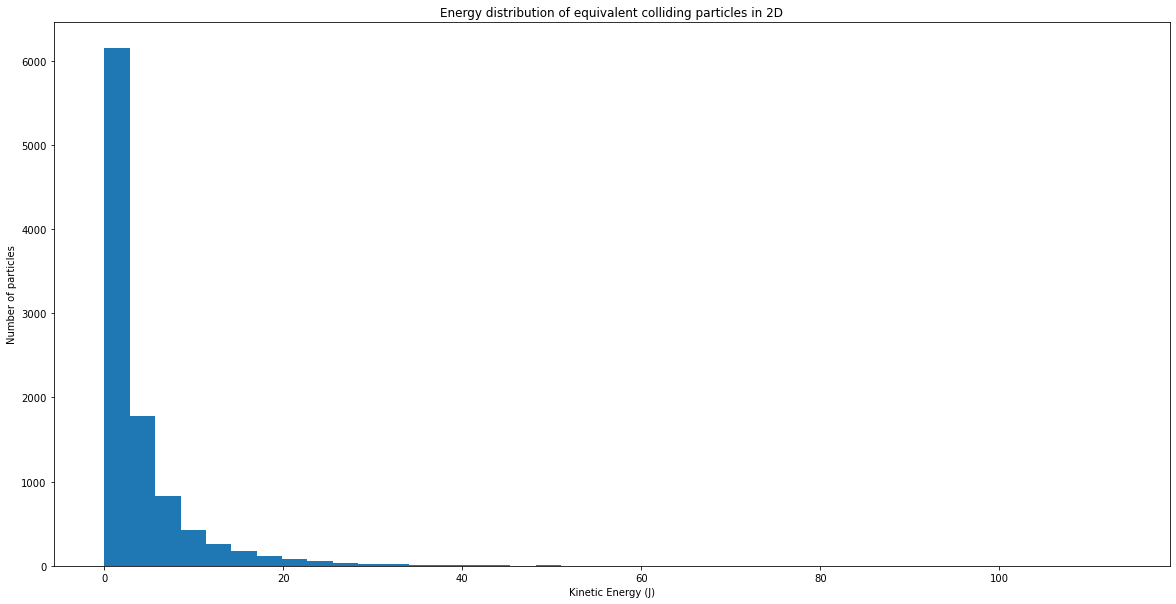

C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:21: RuntimeWarning: overflow encountered in exp
  return k*2*alpha/np.pi*(v)* np.exp(-alpha*(v)**2)


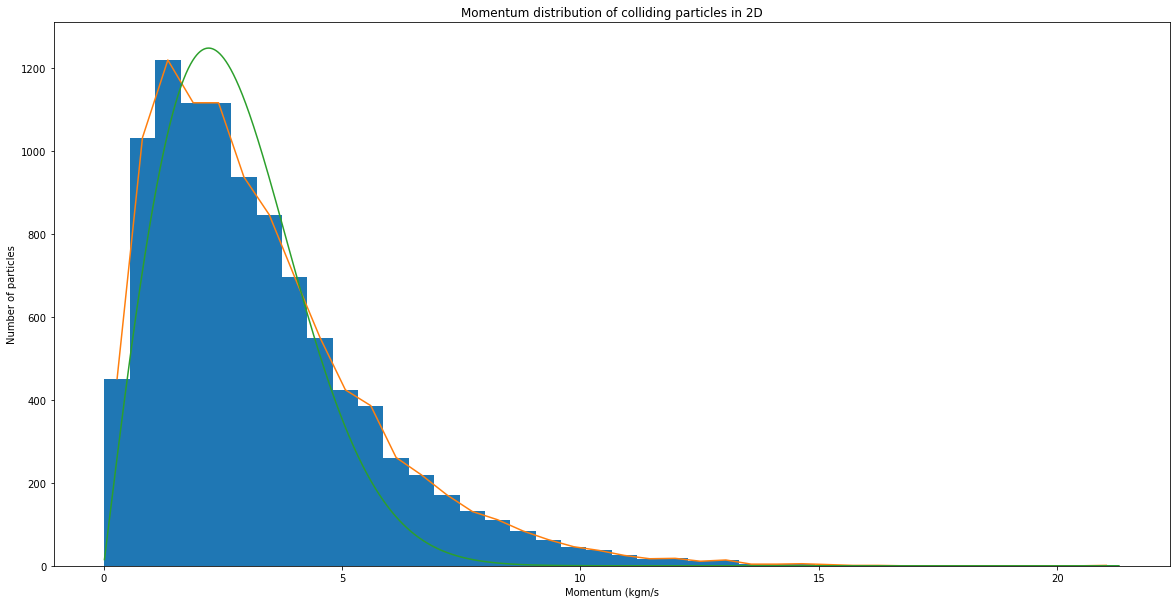

C:\Users\leonb\AppData\Local\Temp\ipykernel_14388\2319191884.py:21: RuntimeWarning: overflow encountered in exp
  return k*2*alpha/np.pi*(v)* np.exp(-alpha*(v)**2)


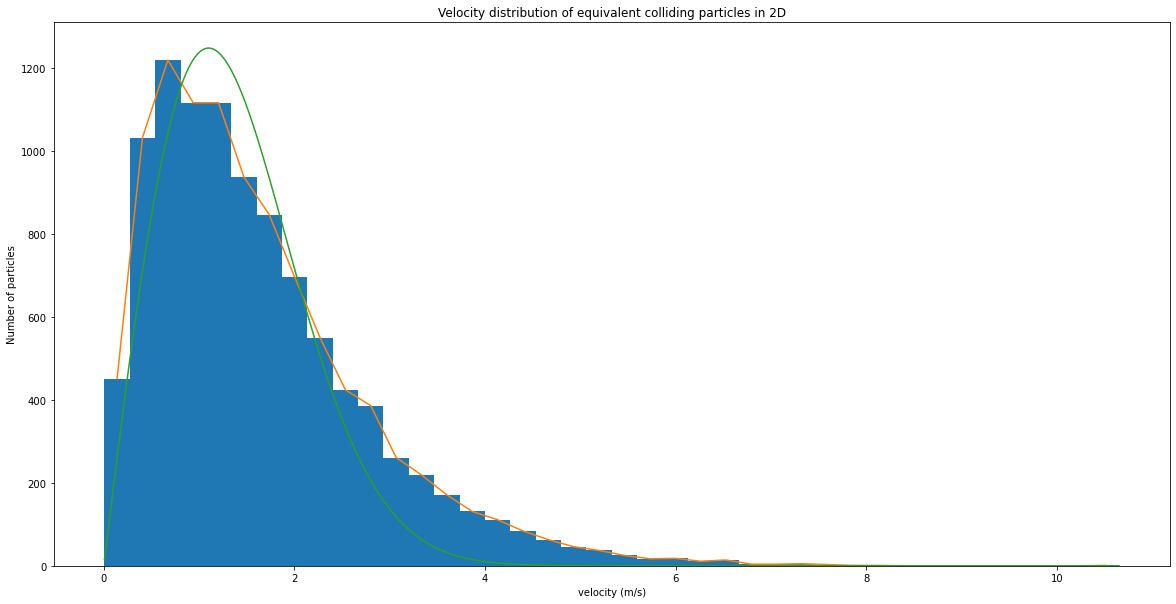

In [50]:
class Simulation():
    
    def __init__ (self,starting_velocity = 1,particle_mass = 2, no_particles = 100, no_collisions=1000, Temperature = 273):
        self.no_particles = int(no_particles)
        self.no_collisions = int(no_collisions)
        self.T = Temperature
        self.v0 = starting_velocity
        self.m = particle_mass
        
        self.init_particles()
        
    def init_particles(self):
        
        self.particle_history = np.ones([6,self.no_particles,self.no_collisions],dtype=float)
        self.particles = []

        # Creating particle object for each particle in simulation
        for i in range(self.no_particles):
            
            # Creating particle with velocity v0 and mass m
            particle = Particle2D(velocity_x = self.v0, velocity_y = self.v0, m = self.m)
            
            # Adding newly created particle to particle array
            self.particles.append(particle)
            
            # Adding particle properties to history array
            self.particle_history[0,i,0] = particle.velocity_x
            self.particle_history[1,i,0] = particle.velocity_y
            self.particle_history[2,i,0] = particle.mass
            self.particle_history[3,i,0] = particle.energy
            self.particle_history[4,i,0] = particle.momentum[0]
            self.particle_history[5,i,0] = particle.momentum[1]
            
    
    def begin_simulation(self,collision_type = 'random'):
        self.type = collision_type
        
        for step in range(1,self.no_collisions):
            self.step = step
            self.simulate_set_of_collisions()
        
        self.plot_energy_histogram()
        self.plot_momentum_histogram()
        self.plot_velocity_histogram()
        
        
    def simulate_set_of_collisions(self):
        # Randomise which particle is being collided with using randomised collision array as an index for collisions
        collision_partner = np.array(range(0,self.no_particles))
        np.random.shuffle(collision_partner)
        
        # number of collisions = number of particles/2
        for i in range(int(self.no_particles/2)):
            
            #index for collisions partners
            index1 = collision_partner[i]
            index2 = collision_partner[(i+int(self.no_particles/2)) % self.no_particles] # modulus to wrap array indices
            
            # Calling the collision method
            self.collision(self.particles[index1],self.particles[index2])
            
            # Updating particle history
            
            self.particle_history[0,index1,self.step] = self.particles[index1].velocity_x
            self.particle_history[0,index2,self.step] = self.particles[index2].velocity_x
            
            self.particle_history[1,index1,self.step] = self.particles[index1].velocity_y
            self.particle_history[1,index2,self.step] = self.particles[index2].velocity_y
            
            self.particle_history[2,index1,self.step] = self.particles[index1].mass
            self.particle_history[2,index2,self.step] = self.particles[index2].mass
            
            self.particle_history[3,index1,self.step] = self.particles[index1].energy
            self.particle_history[3,index2,self.step] = self.particles[index2].energy
            
            self.particle_history[4,index1,self.step] = self.particles[index1].momentum[0]
            self.particle_history[4,index2,self.step] = self.particles[index2].momentum[0]
            
            self.particle_history[5,index1,self.step] = self.particles[index1].momentum[1]
            self.particle_history[5,index2,self.step] = self.particles[index2].momentum[1]
            
    def collision(self,particle1,particle2):
        
        # Select for type of collision
        if self.type == 'random':
            self.random_collision(particle1,particle2)
        
            
    def random_collision(self,particle1,particle2):
        
        # Momentum in x and y is conserved
        
        # mv + m'v' (before) = mv + m'v' (after) 
        p_x_before = particle1.mass*particle1.velocity_x + particle2.mass*particle2.velocity_x
        p_y_before = particle1.mass*particle1.velocity_y + particle2.mass*particle2.velocity_y
        
        # Randomise transfer of energy between 2 particles
        fractional_momentum_transfer_x = np.random.random()
        fractional_momentum_transfer_y = np.random.random()
        
        p_x_after_1 = fractional_momentum_transfer_x*p_x_before        
        p_x_after_2 = (1-fractional_momentum_transfer_x)*p_x_before
        
        p_y_after_1 = fractional_momentum_transfer_y*p_y_before
        p_y_after_2 = (1-fractional_momentum_transfer_y)*p_y_before

        
        v_x_after_1 = p_x_after_1/particle1.mass
        v_x_after_2 = p_x_after_2/particle2.mass
        
        v_y_after_1 = p_y_after_1/particle1.mass
        v_y_after_2 = p_y_after_2/particle2.mass
        
        # Returning velocities after the collision
        
        particle1.velocity_x = v_x_after_1
        particle1.velocity_y = v_y_after_1

        particle2.velocity_x = v_x_after_2
        particle2.velocity_y = v_y_after_2
        
    
    def fit_Maxwell_Boltzmann_2D(self,bin_heights, bin_edges):
        
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)
        
        opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_2D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')
        
    def plot_energy_histogram(self):
        
        # Plotting histogram and extracting parameters for fitting with distribution
        bin_heights , bin_edges, _ = plt.hist(self.particle_history[3,-1,:],bins=40)
        
        # self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        
        
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Kinetic Energy (J)')
        plt.ylabel('Number of particles')
        plt.title('Energy distribution of equivalent colliding particles in 2D')
        plt.show()
        
    def plot_momentum_histogram(self):
            
        magnitude_momentum = np.sqrt(np.square(self.particle_history[4,-1,:])+np.square(self.particle_history[5,-1,:]))        
        bin_heights , bin_edges, _ = plt.hist(magnitude_momentum,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Momentum (kgm/s')
        plt.ylabel('Number of particles')
        plt.title('Momentum distribution of colliding particles in 2D')
        plt.show()
        
    
    def plot_velocity_histogram(self):
        
        magnitude_velocity = np.sqrt(np.square(self.particle_history[0,-1,:])+np.square(self.particle_history[1,-1,:]))
        bin_heights, bin_edges, _ = plt.hist(magnitude_velocity,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('velocity (m/s)')
        plt.ylabel('Number of particles')
        plt.title('Velocity distribution of equivalent colliding particles in 2D')
        plt.show()
        
        
        
# Creating an array of random numbers for the starting velocities of n particles
no_particles = 100
no_collisions = 10
        
sim = Simulation(no_particles=100,no_collisions=10000)

sim.begin_simulation()

# for i,value in enumerate(sim.particles[:]):
#     print(sim.particles[i].velocity_x)
# print(sim.particle_history[0,:,0]) 